![lop](../../images/logo_diive1_128px.png)

<span style='font-size:40px; display:block;'>
<b>
    Quick Flux Processing Chain
</b>
</span>

---
**Notebook version**: `1` (5 Feb 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

# Description

- quick (simplified) version of the flux processing chain
- uses a lot of default values, which means not a lot of user input is needed
- recommended to quickly check on current data
- produces data up to Level-3.2
- for more info about flux levels see [Flux Processing Chain](https://www.swissfluxnet.ethz.ch/index.php/data/ecosystem-fluxes/flux-processing-chain/)

# Settings

In [1]:
FLUXVARS = ['FC', 'LE', 'H']  # Name of the flux variable in fluxnet output files: FC, FH2O, LE, ET, H, FN2O, FCH4; must be given as list even if there is only one variable
SOURCEDIRS = [r'F:\TMP\FRU']  # Folders where the EddyPro output files are located
SITE_LAT = 47.115833  # Latitude of site
SITE_LON = 8.537778  # Longitude of site
FILETYPE = 'EDDYPRO-FLUXNET-CSV-30MIN'  # Filetype of EddyPro output files, can be 'EDDYPRO-FLUXNET-CSV-30MIN' or 'EDDYPRO-FULL-OUTPUT-CSV-30MIN'
UTC_OFFSET = 1  # Time stamp offset in relation to UTC, e.g. 1 for UTC+01:00 (CET), important for the calculation of potential radiation for detecting daytime and nighttime
NIGHTTIME_THRESHOLD = 50  # Threshold for potential radiation in W m-2, conditions below threshold are nighttime
DAYTIME_ACCEPT_QCF_BELOW = 2
NIGHTTIMETIME_ACCEPT_QCF_BELOW = 2

# Imports

In [2]:
import importlib.metadata
import warnings
from datetime import datetime
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
from diive.pkgs.fluxprocessingchain.fluxprocessingchain import QuickFluxProcessingChain
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.78.0


# Run

Found 40 files with extension *.csv and file IDs ['eddypro_', '_fluxnet_']:
 Found file #1: F:\TMP\FRU\eddypro_CH-FRU_FR-20240605-135058_fluxnet_2024-06-05T140107_adv.csv
 Found file #2: F:\TMP\FRU\eddypro_CH-FRU_FR-20240606-085002_fluxnet_2024-06-06T085029_adv.csv
 Found file #3: F:\TMP\FRU\eddypro_CH-FRU_FR-20240607-085003_fluxnet_2024-06-07T085028_adv.csv
 Found file #4: F:\TMP\FRU\eddypro_CH-FRU_FR-20240608-085002_fluxnet_2024-06-08T085024_adv.csv
 Found file #5: F:\TMP\FRU\eddypro_CH-FRU_FR-20240609-085002_fluxnet_2024-06-09T085025_adv.csv
 Found file #6: F:\TMP\FRU\eddypro_CH-FRU_FR-20240610-085002_fluxnet_2024-06-10T085025_adv.csv
 Found file #7: F:\TMP\FRU\eddypro_CH-FRU_FR-20240611-085002_fluxnet_2024-06-11T085024_adv.csv
 Found file #8: F:\TMP\FRU\eddypro_CH-FRU_FR-20240612-085002_fluxnet_2024-06-12T085024_adv.csv
 Found file #9: F:\TMP\FRU\eddypro_CH-FRU_FR-20240613-085002_fluxnet_2024-06-13T085024_adv.csv
 Found file #10: F:\TMP\FRU\eddypro_CH-FRU_FR-20240614-085003_fluxnet

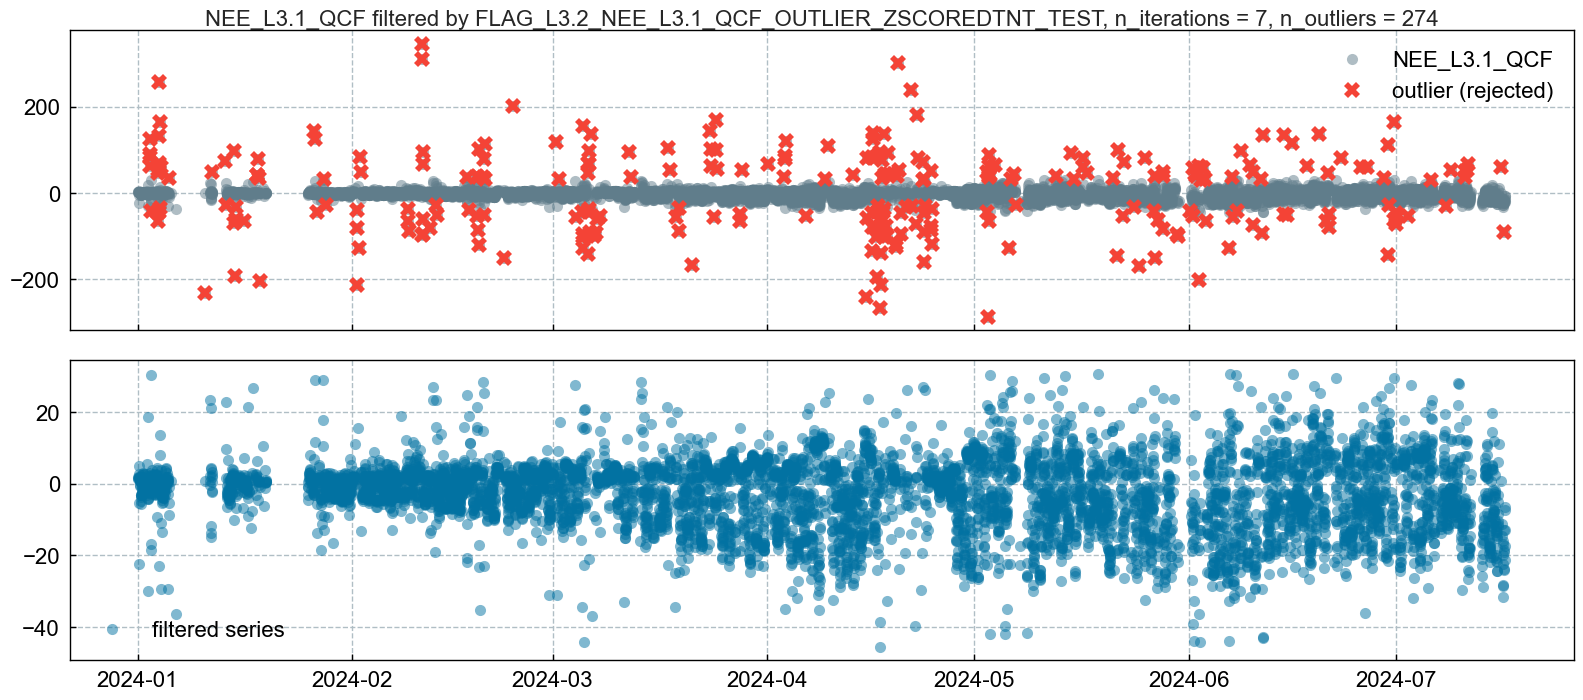

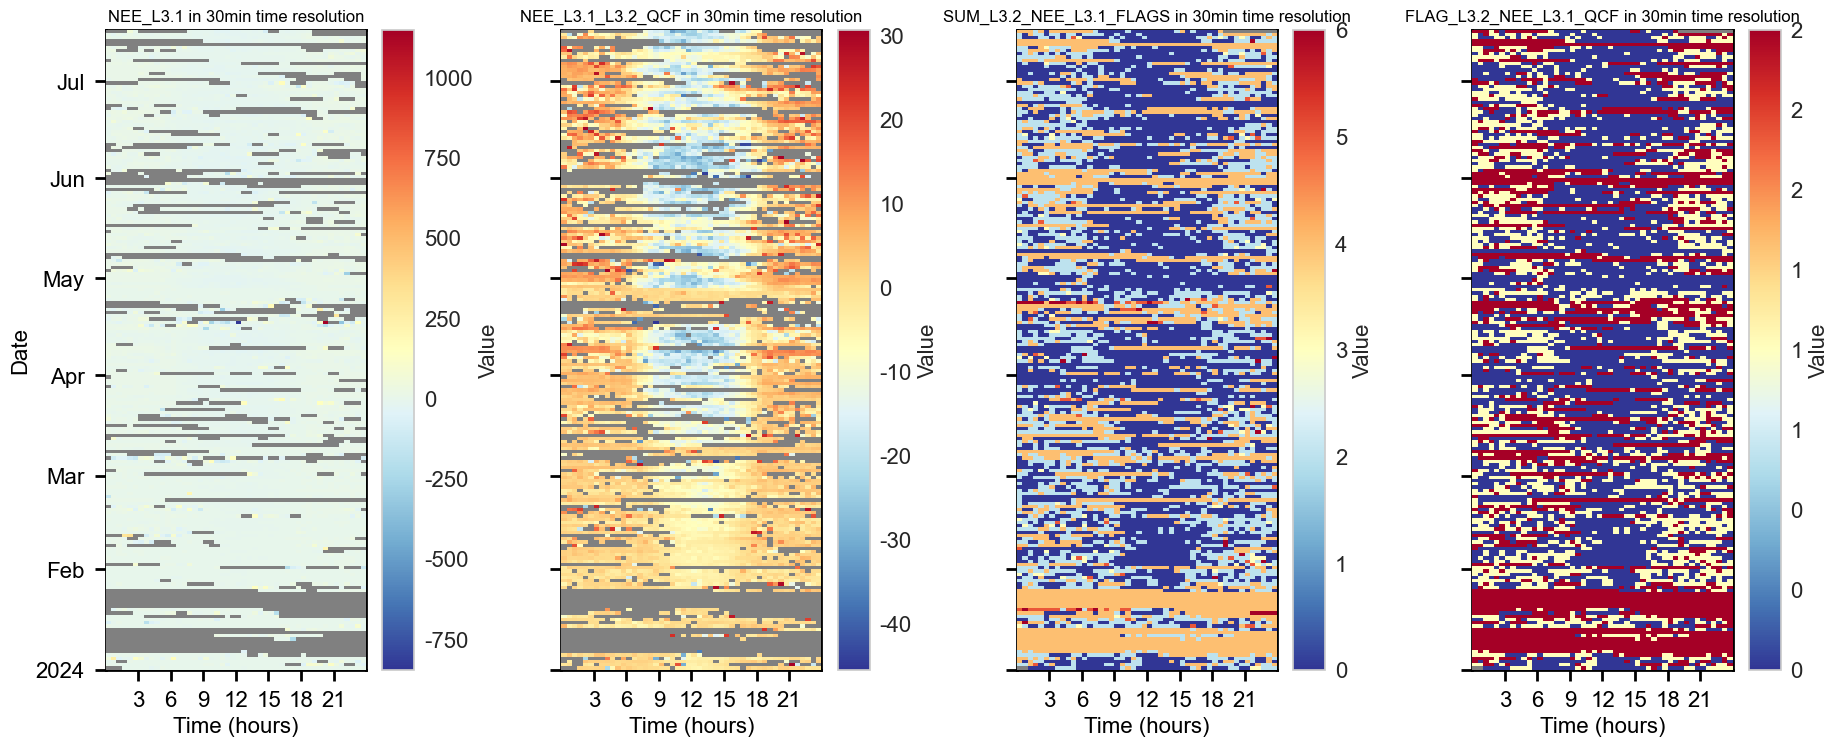

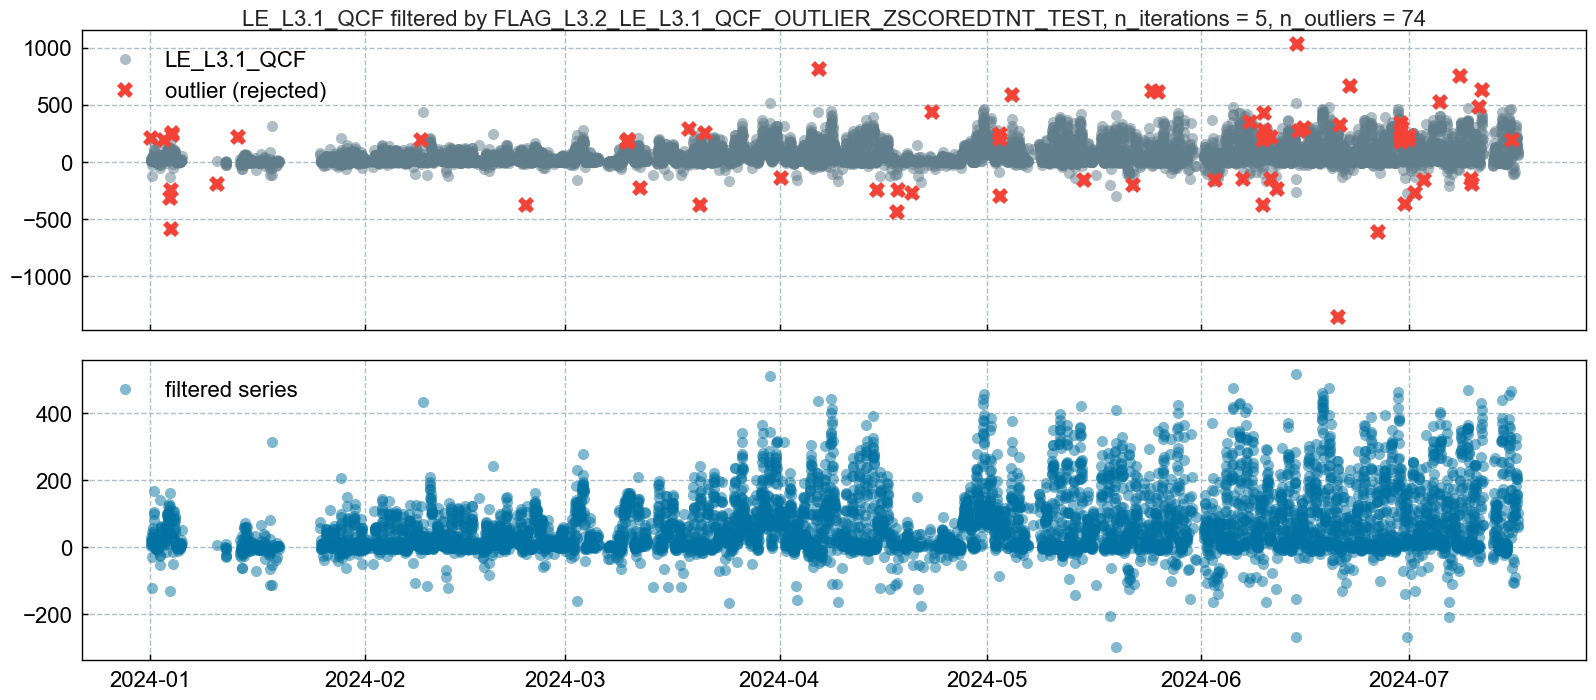

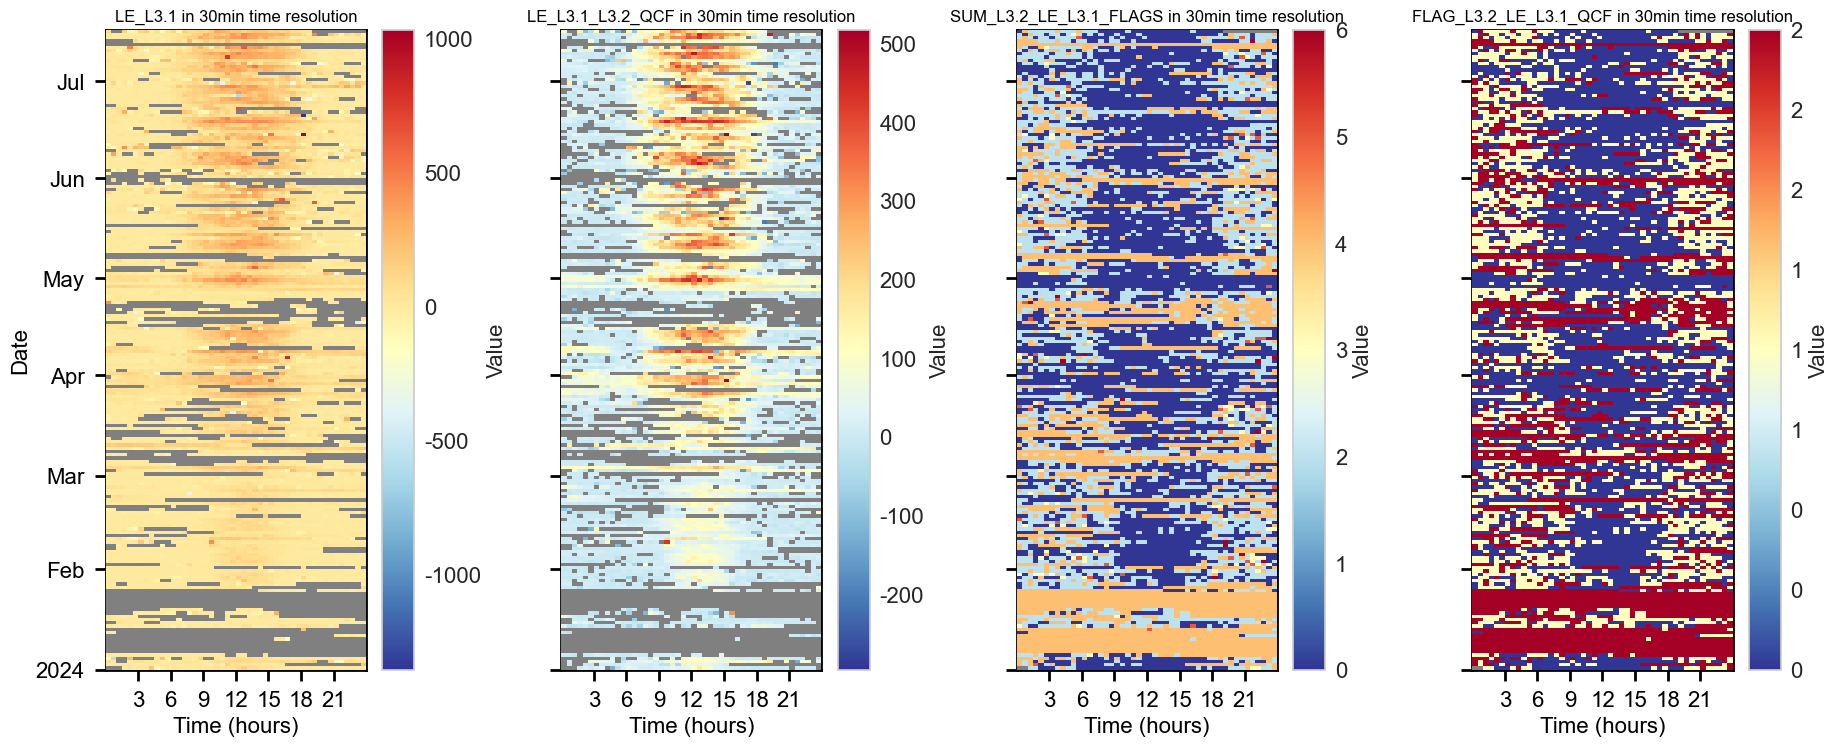

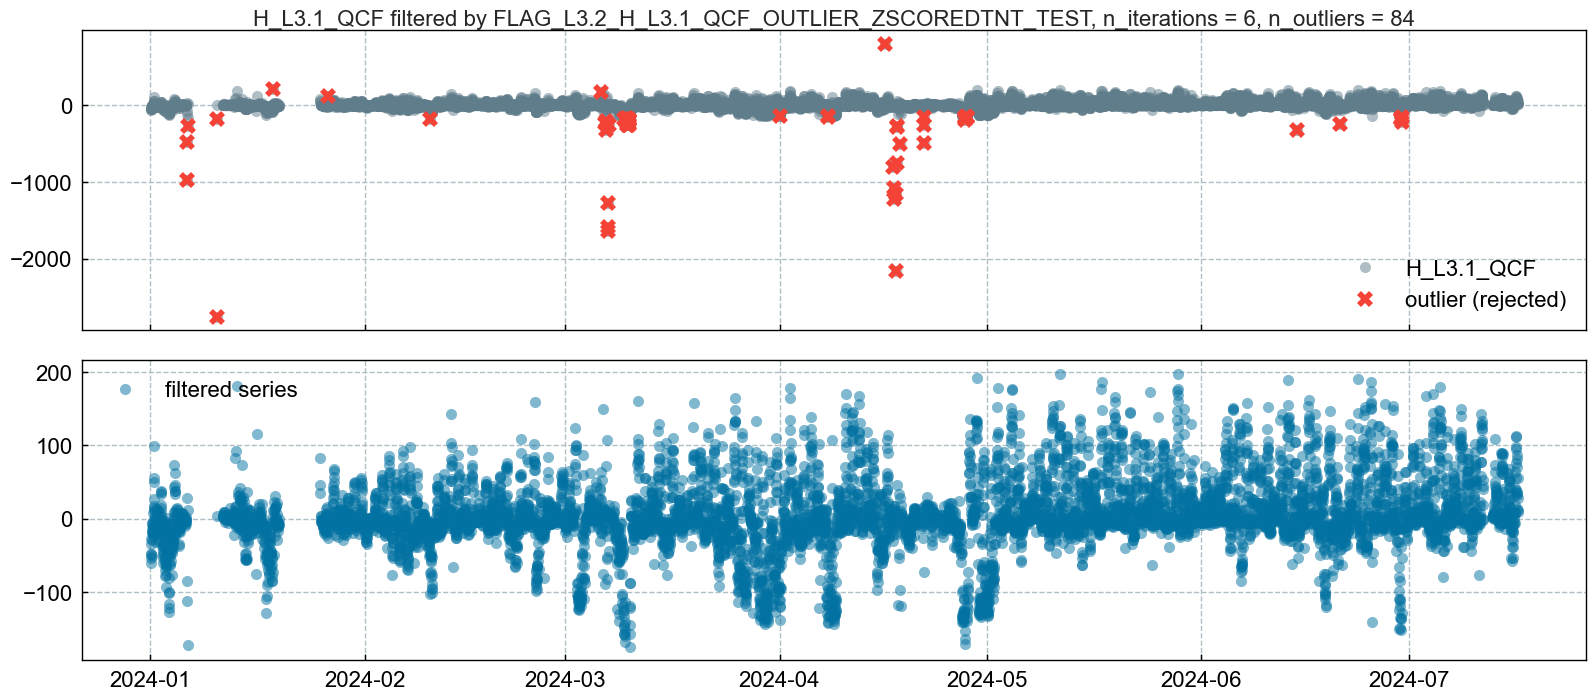

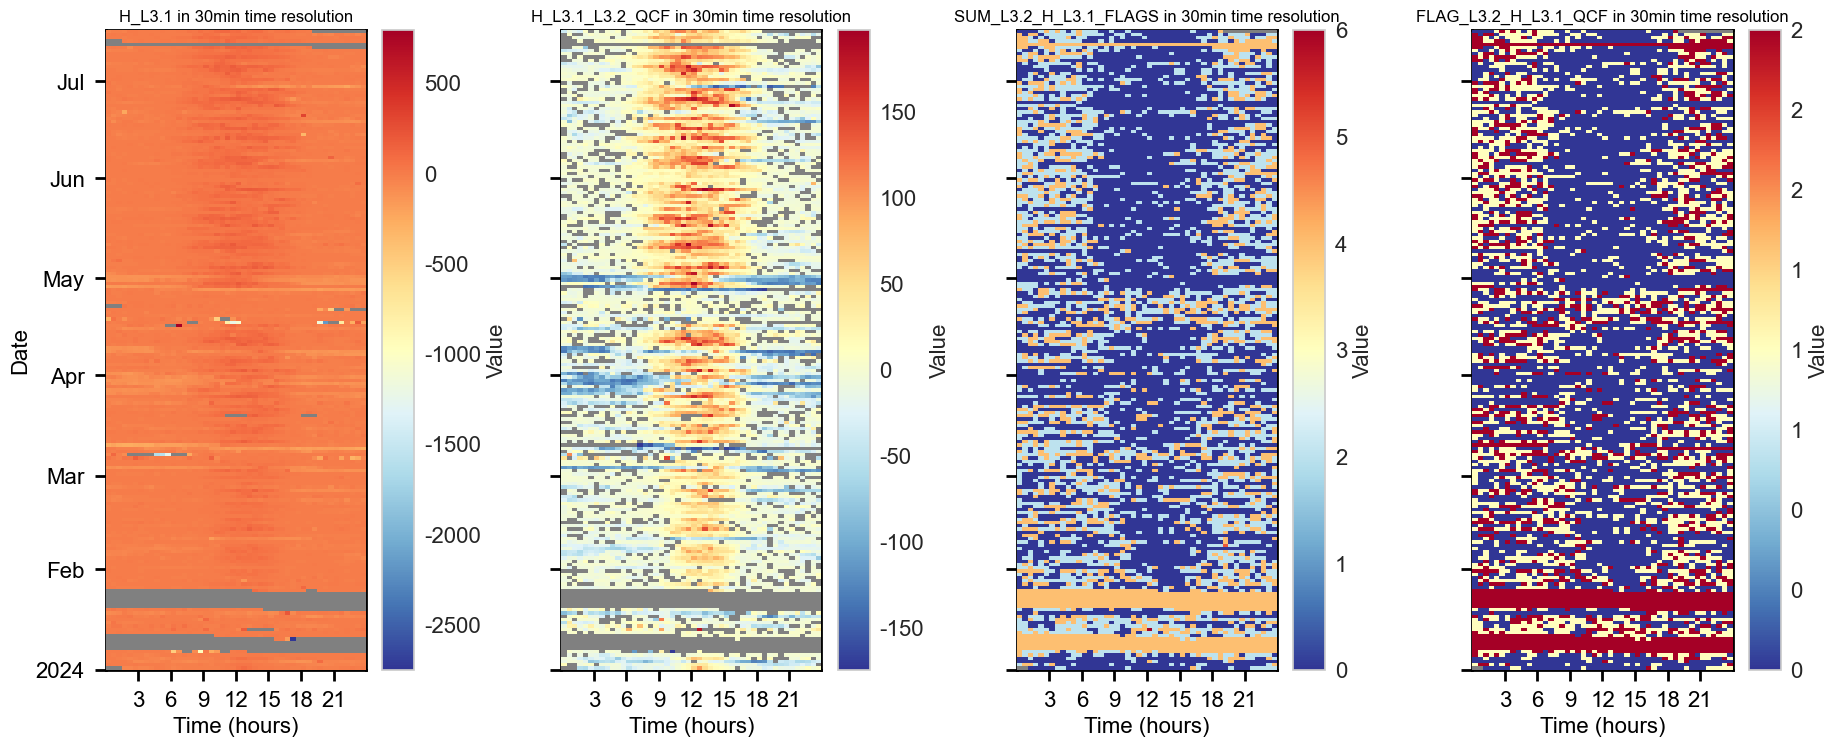

In [3]:
qfpc = QuickFluxProcessingChain(
    fluxvars=FLUXVARS,
    sourcedirs=SOURCEDIRS,
    site_lat=SITE_LAT,
    site_lon=SITE_LON,
    filetype=FILETYPE,
    utc_offset=UTC_OFFSET,
    nighttime_threshold=NIGHTTIME_THRESHOLD,
    daytime_accept_qcf_below=DAYTIME_ACCEPT_QCF_BELOW,
    nighttimetime_accept_qcf_below=NIGHTTIMETIME_ACCEPT_QCF_BELOW
)

</br>

In [4]:
quickresults_df =  qfpc.fpc.fpc_df
quickresults_df.head()

,H,SW_IN_POT,DAYTIME,NIGHTTIME,FLAG_L2_H_MISSING_TEST,FLAG_L2_H_SSITC_TEST,...,SUM_L3.2_H_L3.1_HARDFLAGS,SUM_L3.2_H_L3.1_SOFTFLAGS,SUM_L3.2_H_L3.1_FLAGS,FLAG_L3.2_H_L3.1_QCF,H_L3.1_L3.2_QCF,H_L3.1_L3.2_QCF0
TIMESTAMP_MIDDLE,,,,,,,,,,,,,
2024-01-01 01:15:00,-58.5935,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN
2024-01-01 01:45:00,-55.4858,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-54.126450,-54.126450
2024-01-01 02:15:00,-60.7965,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-60.073778,-60.073778
2024-01-01 02:45:00,-27.3793,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-27.999489,-27.999489
2024-01-01 03:15:00,-47.9022,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-47.397114,-47.397114


</br>

# **End of notebook**
Congratulations, you reached the end of this notebook! Before you go let's store your finish time.

In [5]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2024-07-17 16:48:19
